In [306]:
!pip install selenium
import pandas as pd
import json
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import InvalidSelectorException
import time
import warnings
warnings.filterwarnings('ignore')

In [307]:
driver = webdriver.Chrome('C:/Users/slogn/chromedriver.exe')
driver.maximize_window()
url = 'https://www.ihf.info/competitions/men/308/28th-ihf-mens-world-championship-2023/101253/statistics'
driver.get(url)

In [308]:
team = driver.find_elements(By.XPATH, "//div[@class = 'stats-two-icons']/a")[1]
team_details_url=team.get_attribute("href")
print(team_details_url)

https://www.ihf.info/competitions/men/308/28th-ihf-mens-world-championship-2023/101253/statistics/top-team-players


In [309]:
driver.get(team_details_url)

In [310]:
from bs4 import BeautifulSoup
import requests

In [311]:
players_data=requests.get(team_details_url).text
players_soup=BeautifulSoup(players_data,'html.parser')
players_tables=players_soup.find('table')

players = pd.DataFrame(columns=["players_name","total_goal", "total_shot", "total_6m_goal", 
                             "total_6m_shot", "total_9m_goal","total_9m_shot"])
team_url=[]
for row in players_tables.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        
        try:
            url = col[0].find_all('div')[0].find_all("div")[0]
            team_url.append(url)
            
        except:
            pass
def url_extract(text):
    step1= text.split('(')
    step2=step1[1].split(')')
    return step2[0]

urls= [url_extract(url.attrs['style']) for url in team_url]
urls

['https://www.ihf.info/sites/default/files/2018-12/Algeria.png',
 'https://www.ihf.info/sites/default/files/2018-12/Argentina.png',
 'https://www.ihf.info/sites/default/files/2018-12/Belgium.png',
 'https://www.ihf.info/sites/default/files/2018-12/Brazil.png',
 'https://www.ihf.info/sites/default/files/2019-07/Flag%20of%20Bahrain.png',
 'https://www.ihf.info/sites/default/files/2018-12/Chile.png',
 'https://www.ihf.info/sites/default/files/2018-12/Cape_Verde.png',
 'https://www.ihf.info/sites/default/files/2018-12/Croatia.png',
 'https://www.ihf.info/sites/default/files/2018-12/Denmark.png',
 'https://www.ihf.info/sites/default/files/2018-12/Egypt.png',
 'https://www.ihf.info/sites/default/files/2018-12/Spain.png',
 'https://www.ihf.info/sites/default/files/2018-12/France.png',
 'https://www.ihf.info/sites/default/files/2018-12/Germany.png',
 'https://www.ihf.info/sites/default/files/2018-12/Hungary.png',
 'https://www.ihf.info/sites/default/files/2018-12/Iran.png',
 'https://www.ihf.i

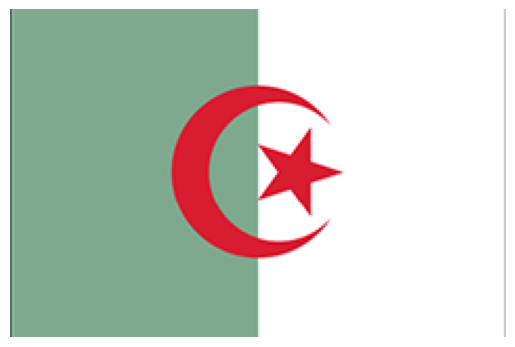

In [312]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

url='https://www.ihf.info/sites/default/files/2018-12/Algeria.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw) 

plt.imshow(img)
img = img.save('1.png')
plt.axis('off')
plt.show()

In [313]:
players_data=requests.get(team_details_url).text
players_soup=BeautifulSoup(players_data,'html.parser')
players_tables=players_soup.find('table')

players = pd.DataFrame(columns=["players_name","total_goal", "total_shot", "total_6m_goal", 
                             "total_6m_shot", "total_9m_goal","total_9m_shot"])
for row in players_tables.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        players_name = col[1].text
        total_goal = col[2].text
        total_shot = col[3].text
        total_6m_goal = col[4].text
        total_6m_shot = col[5].text
        total_9m_goal = col[6].text
        total_9m_shot = col[7].text
        players = players.append({"players_name":players_name,"total_goal":total_goal, "total_shot":total_shot, 
                            "total_6m_goal":total_6m_goal, "total_6m_shot":total_6m_shot, 
                            "total_9m_goal":total_9m_goal,"total_9m_shot":total_9m_shot}, ignore_index=True)

players

,players_name,total_goal,total_shot,total_6m_goal,total_6m_shot,total_9m_goal,total_9m_shot
0,Algeria,183,327,59,113,40,90
1,Argentina,142,254,31,78,13,46
2,Belgium,163,282,58,104,22,56
3,Brazil,173,295,47,90,30,79
4,Bahrain,164,277,67,117,18,51
5,Chile,202,319,83,143,17,36
6,Cape Verde,171,296,89,156,24,69
7,Croatia,207,282,65,88,41,72
8,Denmark,308,424,80,119,71,106
9,Egypt,272,428,79,124,65,132


In [341]:
players.to_csv("C:/Users/slogn/Documents/IHF_competition_dashboards/players_goal_shots.csv")

In [314]:
# driver.get(team_details_url)
goal_keeper = driver.find_elements(By.XPATH, "//div[@class='row']//ul[@class='nav nav-tabs']/li/a")[1]
goal_keeper_url=goal_keeper.get_attribute("href")
print(goal_keeper_url)

https://www.ihf.info/competitions/men/308/28th-ihf-mens-world-championship-2023/101253/statistics/top-team-goalkeepers


In [315]:
driver.get(goal_keeper_url)

In [316]:
goal_keeper_data=requests.get(goal_keeper_url).text
goal_keeper_soup=BeautifulSoup(goal_keeper_data,'html.parser')
goal_keeper_table=goal_keeper_soup.find('table')
len(goal_keeper_table)

5

In [317]:
goal_keeper = pd.DataFrame(columns=["team_name","total_save", "total_shot", "total_6m_save", "total_6m_shot",
                                    "total_9m_save","total_9m_shot","total_7m_save","total_7m_shot"])
for row in goal_keeper_table.tbody.find_all("tr"):
    col_g = row.find_all("td")
    if (col_g != []):
        team_name = col_g[1].text
        total_save = col_g[2].text
        total_shot = col_g[3].text
        total_6m_save = col_g[4].text
        total_6m_shot = col_g[5].text
        total_9m_save = col_g[6].text
        total_9m_shot = col_g[7].text
        total_7m_save = col_g[8].text
        total_7m_shot = col_g[9].text
        goal_keeper = goal_keeper.append({"team_name":team_name,"total_save":total_save, "total_shot":total_shot, 
                                          "total_6m_save":total_6m_save, "total_6m_shot":total_6m_shot, 
                                          "total_9m_save":total_9m_save,"total_9m_shot":total_9m_shot,
                                         "total_7m_save":total_7m_save,"total_7m_shot":total_7m_shot}, ignore_index=True)

goal_keeper

,team_name,total_save,total_shot,total_6m_save,total_6m_shot,total_9m_save,total_9m_shot,total_7m_save,total_7m_shot
0,Algeria,66,299,33,130,11,48,3,16
1,Argentina,40,216,17,74,10,38,3,22
2,Belgium,71,264,28,92,16,58,6,19
3,Brazil,66,241,35,105,13,35,4,18
4,Bahrain,62,249,29,81,8,28,1,12
5,Chile,63,268,31,111,18,40,4,27
6,Cape Verde,47,253,22,86,13,37,4,24
7,Croatia,63,230,25,76,23,63,6,22
8,Denmark,115,341,37,125,43,81,11,37
9,Egypt,117,350,37,121,48,108,6,21


In [343]:
goal_keeper.to_csv("C:/Users/slogn/Documents/IHF_competition_dashboards/team_goalkeeper_save_shots.csv")

In [318]:
statistic = driver.find_elements(By.XPATH, "//ul[@class='menu sf-js-enabled sf-arrows']/li/a")[6]
statistic_url=statistic.get_attribute("href")
print(statistic_url)

https://www.ihf.info/competitions/men/308/28th-ihf-mens-world-championship-2023/101253/statistics


In [319]:
driver.get(statistic_url)
top_soccer = driver.find_elements(By.XPATH, "//div[@class = 'stats-two-icons']/a")[3]
top_soccer_url=top_soccer.get_attribute("href")

driver.get(top_soccer_url)

top_soccer = pd.DataFrame(columns=['player_name','team_name','goals','shots','efficiency','total_7m_shot','matches_played'])

try:

    while driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']"):

        top_soccer_data=requests.get(top_soccer_url).text
        top_soccer_soup=BeautifulSoup(top_soccer_data,'html.parser')
        top_soccer_table=top_soccer_soup.find_all('table')

        for row in top_soccer_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                goals = col_g[4].text
                shots = col_g[5].text
                efficiency = col_g[6].text
                total_7m_shot = col_g[7].text
                matches_played=col_g[8].text
                top_soccer = top_soccer.append({'player_name':player_name,'team_name':team_name,'goals':goals
                                                ,'shots':shots,'efficiency':efficiency,'total_7m_shot':total_7m_shot
                                                ,'matches_played':matches_played}, ignore_index=True)
        
        
        top_soccer_url = driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a").get_attribute("href")
        driver.get(top_soccer_url)
        time.sleep(1)
        
except:
        top_soccer_data=requests.get(top_soccer_url).text
        top_soccer_soup=BeautifulSoup(top_soccer_data,'html.parser')
        top_soccer_table=top_soccer_soup.find_all('table')

        for row in top_soccer_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                goals = col_g[4].text
                shots = col_g[5].text
                efficiency = col_g[6].text
                total_7m_shot = col_g[7].text
                matches_played=col_g[8].text
                top_soccer = top_soccer.append({'player_name':player_name,'team_name':team_name,'goals':goals
                                                ,'shots':shots,'efficiency':efficiency,'total_7m_shot':total_7m_shot
                                                ,'matches_played':matches_played}, ignore_index=True)      
            

top_soccer

,player_name,team_name,goals,shots,efficiency,total_7m_shot,matches_played
0,Mathias GIDSEL,Denmark,60,80,75,,9
1,Erwin FEUCHTMANN,Chile,54,77,70,21 / 25,7
2,Juri KNORR,Germany,53,85,62,23 / 25,9
3,Simon Bogetoft PYTLICK,Denmark,51,70,73,,9
4,Bjarki Már ELÍSSON,Iceland,45,59,76,11 / 11,6
...,...,...,...,...,...,...,...
488,Iso Sluijters,Netherlands,1,1,100,,6
489,Zvonimir Srna,Croatia,1,2,50,,1
490,Hákon Daði STYRMISSON,Iceland,1,1,100,,6
491,Erik TOFT,Norway,1,6,17,,5


In [344]:
top_soccer.to_csv("C:/Users/slogn/Documents/IHF_competition_dashboards/top_soccer_goal_shots_efficiency.csv")

In [320]:
top_soccer.tail(20)

,player_name,team_name,goals,shots,efficiency,total_7m_shot,matches_played
473,Mateusz Kornecki,Poland,1,1,100,,3
474,Niklas LANDIN JACOBSEN,Denmark,1,1,100,,9
475,Kamal AL DIN MALLASH,Qatar,1,3,33,,3
476,Vahid Masoudi Marghmaleki,Islamic Republic of Iran,1,1,100,,5
477,Bilel MESSOUD MRARHA,Qatar,1,2,50,,1
478,Nikola Mitrevski,North Macedonia,1,1,100,,7
479,Lasse K. MØLLER,Denmark,1,4,25,,1
480,Andreas PALICKA,Sweden,1,1,100,,7
481,IGNACIO PECIÑA TOME,Spain,1,1,100,,8
482,Shady RAMADAN,Egypt,1,2,50,,1


In [321]:
# try:
#     while driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']"):
#         print("yes")
# except:
#     pass

In [336]:
assist=driver.find_elements(By.XPATH,"//ul[@class='nav nav-tabs']/li/a")[1]
assist_url=assist.get_attribute("href")

driver.get(assist_url)

assist = pd.DataFrame(columns=['player_name','team_name','assists','matches_played'])

try:

    while driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a"):

        assist_data=requests.get(assist_url).text
        assist_soup=BeautifulSoup(assist_data,'html.parser')
        assist_table=assist_soup.find_all('table')

        for row in assist_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                assists = col_g[4].text
                matches_played = col_g[5].text

                assist = assist.append({'player_name':player_name,'team_name':team_name,'assists':assists
                                                ,'matches_played':matches_played}, ignore_index=True)
                
        
        assist_url = driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a").get_attribute("href")
        driver.get(assist_url)   
        time.sleep(1)
except:
        assist_data=requests.get(assist_url).text
        assist_soup=BeautifulSoup(assist_data,'html.parser')
        assist_table=assist_soup.find_all('table')

        for row in assist_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                assists = col_g[4].text
                matches_played = col_g[5].text

                assist = assist.append({'player_name':player_name,'team_name':team_name,'assists':assists
                                                ,'matches_played':matches_played}, ignore_index=True)    
    
                

In [337]:
assist

,player_name,team_name,assists,matches_played
0,Juri KNORR,Germany,52,9
1,Sander SAGOSEN,Norway,49,9
2,Mathias GIDSEL,Denmark,42,9
3,Nedim REMILI,France,40,9
4,Gísli Þorgeir Kristjánsson,Iceland,39,6
...,...,...,...,...
445,Martin Tomovski,North Macedonia,1,7
446,Vukašin VORKAPIĆ,Serbia,1,6
447,Milos Vujovic,Montenegro,1,6
448,DJEDID YACINE,Algeria,1,7


In [345]:
assist.to_csv("C:/Users/slogn/Documents/IHF_competition_dashboards/player_assists.csv")

In [338]:
assist['assists']=assist['assists'].astype(int)
assist.groupby('team_name').sum()

,assists
team_name,
Algeria,69
Argentina,74
Bahrain,72
Belgium,94
Brazil,109
Cape Verde,81
Chile,91
Croatia,112
Denmark,169


In [325]:
goal_assist=driver.find_elements(By.XPATH,"//ul[@class='nav nav-tabs']/li/a")[2]
goal_assist_url=goal_assist.get_attribute("href")

driver.get(goal_assist_url)

goal_assist = pd.DataFrame(columns=['player_name','team_name','goal_assists','goals','assists','matches_played'])

try:

    while driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a"):

        goal_assist_data=requests.get(goal_assist_url).text
        goal_assist_soup=BeautifulSoup(goal_assist_data,'html.parser')
        goal_assist_table=goal_assist_soup.find_all('table')

        for row in goal_assist_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                goal_assists = col_g[4].text
                goals = col_g[5].text
                assists = col_g[6].text
                matches_played = col_g[7].text

                goal_assist = goal_assist.append({'player_name':player_name,'team_name':team_name,'goal_assists':goal_assists,
                                        'goals':goals,'assists':assists,'matches_played':matches_played}, ignore_index=True)
                
        
        goal_assist_url = driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a").get_attribute("href")
        driver.get(goal_assist_url)  
        time.sleep(1)
except:
        goal_assist_data=requests.get(goal_assist_url).text
        goal_assist_soup=BeautifulSoup(goal_assist_data,'html.parser')
        goal_assist_table=goal_assist_soup.find_all('table')

        for row in goal_assist_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                assists = col_g[4].text
                matches_played = col_g[5].text

                goal_assist = goal_assist.append({'player_name':player_name,'team_name':team_name,'goal_assists':goal_assists,
                                        'goals':goals,'assists':assists,'matches_played':matches_played}, ignore_index=True)    
    

In [346]:
goal_assist.to_csv("C:/Users/slogn/Documents/IHF_competition_dashboards/players_goal_assists.csv")

In [326]:
goal_assist

,player_name,team_name,goal_assists,goals,assists,matches_played
0,Juri KNORR,Germany,105,53,52,9
1,Sander SAGOSEN,Norway,88,39,49,9
2,Mathias GIDSEL,Denmark,102,60,42,9
3,Nedim REMILI,France,75,35,40,9
4,Gísli Þorgeir Kristjánsson,Iceland,57,18,39,6
5,Alex DUJSHEBAEV DOVICHEBAEVA,Spain,81,44,37,9
6,Jim GOTTFRIDSSON,Sweden,57,20,37,7
7,Mikkel HANSEN,Denmark,77,41,36,9
8,Luka Cindric,Croatia,62,29,33,6
9,Felix CLAAR,Sweden,57,25,32,9


In [327]:
steals=driver.find_elements(By.XPATH,"//ul[@class='nav nav-tabs']/li/a")[3]
steals_url=steals.get_attribute("href")

driver.get(steals_url)

steals = pd.DataFrame(columns=['player_name','team_name','total','average','matches_played'])

try:

    while driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a"):

        steals_data=requests.get(steals_url).text
        steals_soup=BeautifulSoup(steals_data,'html.parser')
        steals_table=steals_soup.find_all('table')

        for row in steals_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                total = col_g[4].text
                average = col_g[5].text
                matches_played = col_g[6].text

                steals = steals.append({'player_name':player_name,'team_name':team_name,'total':total,
                                        'average':average,'matches_played':matches_played}, ignore_index=True)
                
        
        steals_url = driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a").get_attribute("href")
        driver.get(steals_url) 
        time.sleep(1)
except:
        steals_data=requests.get(steals_url).text
        steals_soup=BeautifulSoup(steals_data,'html.parser')
        steals_table=steals_soup.find_all('table')

        for row in steals_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                total = col_g[4].text
                average = col_g[5].text
                matches_played = col_g[6].text

                steals = steals.append({'player_name':player_name,'team_name':team_name,'total':total,
                                        'average':average,'matches_played':matches_played}, ignore_index=True)    
    

In [328]:
steals

,player_name,team_name,total,average,matches_played
0,Ludovic FABREGAS,France,14,1.6,9
1,DANIEL DUJSHEBAEV DOVICHEBAEVA,Spain,10,1.1,9
2,Mathias GIDSEL,Denmark,9,1.0,9
3,Pedro MARTINEZ CAMI,Argentina,9,1.5,6
4,Nedim REMILI,France,8,0.9,9
...,...,...,...,...,...
293,Risto VUJACIC,Montenegro,1,0.2,6
294,Hampus WANNE,Sweden,1,0.1,9
295,Philipp WEBER,Germany,1,0.1,8
296,Ameen ZAKKAR,Qatar,1,0.2,6


In [347]:
steals.to_csv("C:/Users/slogn/Documents/IHF_competition_dashboards/players_steals.csv")

In [329]:
blocked=driver.find_elements(By.XPATH,"//ul[@class='nav nav-tabs']/li/a")[4]
blocked_url=blocked.get_attribute("href")

driver.get(blocked_url)

blocked = pd.DataFrame(columns=['player_name','team_name','total','average','matches_played'])

try:

    while driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a"):

        blocked_data=requests.get(blocked_url).text
        blocked_soup=BeautifulSoup(blocked_data,'html.parser')
        blocked_table=blocked_soup.find_all('table')

        for row in blocked_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                total = col_g[4].text
                average = col_g[5].text
                matches_played = col_g[6].text

                blocked = blocked.append({'player_name':player_name,'team_name':team_name,'total':total,
                                        'average':average,'matches_played':matches_played}, ignore_index=True)
                
        
        blocked_url = driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a").get_attribute("href")
        driver.get(blocked_url) 
        time.sleep(1)
except:
        blocked_data=requests.get(blocked_url).text
        blocked_soup=BeautifulSoup(blocked_data,'html.parser')
        blocked_table=blocked_soup.find_all('table')

        for row in blocked_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                total = col_g[4].text
                average = col_g[5].text
                matches_played = col_g[6].text

                blocked = blocked.append({'player_name':player_name,'team_name':team_name,'total':total,
                                        'average':average,'matches_played':matches_played}, ignore_index=True)    
    

In [349]:
blocked.to_csv("C:/Users/slogn/Documents/IHF_competition_dashboards/players_blocked.csv")

In [330]:
blocked

,player_name,team_name,total,average,matches_played
0,Ibrahim ELMASRY,Egypt,15,1.7,9
1,Blaz BLAGOTINSEK,Slovenia,12,2.0,6
2,Gedeon GUARDIOLA VILLAPLANA,Spain,9,1.0,9
3,Vuk LAZOVIC,Montenegro,9,1.5,6
4,Julian Köster,Germany,7,0.8,9
...,...,...,...,...,...
150,Ferran SOLE SALA,Spain,1,0.1,9
151,Abdelrahman Tarek ABDALLA,Qatar,1,0.2,6
152,Erik TOFT,Norway,1,0.2,5
153,Yves Vancosen,Belgium,1,0.2,6


In [331]:
punishments=driver.find_elements(By.XPATH,"//ul[@class='nav nav-tabs']/li/a")[5]
punishments_url=punishments.get_attribute("href")

driver.get(punishments_url)

punishments = pd.DataFrame(columns=['player_name','team_name','average_pts','total_pts','blue_cards','red_cards',
                                    'two_mins_suspension','yellow_cards','matches_played'])

try:

    while driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a"):

        punishments_data=requests.get(punishments_url).text
        punishments_soup=BeautifulSoup(punishments_data,'html.parser')
        punishments_table=punishments_soup.find_all('table')

        for row in punishments_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                average_pts = col_g[4].text
                total_pts = col_g[5].text
                blue_cards = col_g[6].text
                red_cards = col_g[7].text
                two_mins_suspension = col_g[8].text
                yellow_cards = col_g[9].text
                matches_played = col_g[10].text

                punishments = punishments.append({'player_name':player_name,'team_name':team_name,'average_pts':average_pts,
                                    'total_pts':total_pts,'blue_cards':blue_cards,'red_cards':red_cards,
                                    'two_mins_suspension':two_mins_suspension,'yellow_cards':yellow_cards
                                    ,'matches_played':matches_played}, ignore_index=True)
                
        
        punishments_url = driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a").get_attribute("href")
        driver.get(punishments_url)   
        time.sleep(1)
except:
        punishments_data=requests.get(punishments_url).text
        punishments_soup=BeautifulSoup(punishments_data,'html.parser')
        punishments_table=punishments_soup.find_all('table')

        for row in punishments_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                average_pts = col_g[4].text
                total_pts = col_g[5].text
                blue_cards = col_g[6].text
                red_cards = col_g[7].text
                two_mins_suspension = col_g[8].text
                yellow_cards = col_g[9].text
                matches_played = col_g[10].text

                punishments = punishments.append({'player_name':player_name,'team_name':team_name,'average_pts':average_pts,
                                    'total_pts':total_pts,'blue_cards':blue_cards,'red_cards':red_cards,
                                    'two_mins_suspension':two_mins_suspension,'yellow_cards':yellow_cards
                                    ,'matches_played':matches_played}, ignore_index=True)

In [350]:
punishments.to_csv("C:/Users/slogn/Documents/IHF_competition_dashboards/players_punishments.csv")

In [332]:
punishments

,player_name,team_name,average_pts,total_pts,blue_cards,red_cards,two_mins_suspension,yellow_cards,matches_played
0,Paul Skorupa,United States of America,8.3,25,1,,,,3
1,Jovica NIKOLIĆ,Serbia,7.5,15,,1,,,2
2,Nemanja Grbovic,Montenegro,7.0,21,,1,3,,3
3,Lukas STUTZKE,Germany,6.0,12,,1,4,,2
4,BENDJILALI SOFIANE,Algeria,5.4,38,,2,4,,7
...,...,...,...,...,...,...,...,...,...
75,HASSAN AL-JANABI,Saudi Arabia,1.3,4,,,2,,3
76,Alexandre Cavalcanti,Portugal,1.3,8,,,4,,6
77,Miodrag CORSOVIC,Montenegro,1.3,4,,,2,,3
78,Jure DOLENEC,Slovenia,1.3,8,,,4,,6


In [333]:
driver.get(statistic_url)
fair_play = driver.find_elements(By.XPATH, "//div[@class = 'stats-two-icons']/a")[5]
fair_play_url=fair_play.get_attribute("href")

driver.get(fair_play_url)

fair_play = pd.DataFrame(columns=['team_name','average_pts','total_pts','blue_cards','red_cards',
                                    'two_mins_suspension','yellow_cards','matches_played'])

fair_play_data=requests.get(fair_play_url).text
fair_play_soup=BeautifulSoup(fair_play_data,'html.parser')
fair_play_table=fair_play_soup.find_all('table')

for row in fair_play_table[0].tbody.find_all("tr"):
    col_g = row.find_all("td")
    if (col_g != []):
        team_name = col_g[2].text
        average_pts = col_g[3].text
        total_pts = col_g[4].text
        blue_cards = col_g[5].text
        red_cards = col_g[6].text
        two_mins_suspension=col_g[7].text
        yellow_cards = col_g[8].text
        matches_played=col_g[9].text
        fair_play = fair_play.append({'team_name':team_name,'average_pts':average_pts,
                            'total_pts':total_pts,'blue_cards':blue_cards,'red_cards':red_cards,
                            'two_mins_suspension':two_mins_suspension,'yellow_cards':yellow_cards
                            ,'matches_played':matches_played}, ignore_index=True)
fair_play

,team_name,average_pts,total_pts,blue_cards,red_cards,two_mins_suspension,yellow_cards,matches_played
0,Norway,5.2,47,,,22,3,9
1,Denmark,6.1,55,,,25,5,9
2,Egypt,6.1,55,,1,18,4,9
3,France,6.2,56,,,27,2,9
4,Bahrain,6.5,39,,,19,1,6
5,Uruguay,6.6,46,,,21,4,7
6,Brazil,7.2,43,,,19,5,6
7,Spain,7.3,66,,,31,4,9
8,North Macedonia,7.6,53,,,23,7,7
9,Sweden,7.7,69,,1,25,4,9


In [351]:
fair_play.to_csv("C:/Users/slogn/Documents/IHF_competition_dashboards/team_fair_play.csv")

In [ ]:
fair_play

In [334]:
driver.get(statistic_url)
top_goal_keeper_shots = driver.find_elements(By.XPATH, "//div[@class = 'stats-two-icons']/a")[8]
top_goal_keeper_shots_url=top_goal_keeper_shots.get_attribute("href")

driver.get(top_goal_keeper_shots_url)

top_goal_keeper_shots = pd.DataFrame(columns=['player_name','team_name','efficiency','saves','shots','matches_played'])

try:

    while driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']"):

        top_goal_keeper_shots_data=requests.get(top_goal_keeper_shots_url).text
        top_goal_keeper_shots_soup=BeautifulSoup(top_goal_keeper_shots_data,'html.parser')
        top_goal_keeper_shots_table=top_goal_keeper_shots_soup.find_all('table')

        for row in top_goal_keeper_shots_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                efficiency = col_g[4].text
                saves = col_g[5].text
                shots = col_g[6].text
                matches_played=col_g[7].text
                top_goal_keeper_shots = top_goal_keeper_shots.append({'player_name':player_name,'team_name':team_name,'efficiency':efficiency,
                                                          'saves':saves,'shots':shots,'matches_played':matches_played}, ignore_index=True)
        
        
        top_goal_keeper_shots_url = driver.find_element(By.XPATH, "//ul[@class='pager__items js-pager__items']/li[@class='pager__item pager__item--next']/a").get_attribute("href")
        driver.get(top_goal_keeper_shots_url)
        time.sleep(1)
        
except:
        top_goal_keeper_shots_data=requests.get(top_goal_keeper_shots_url).text
        top_goal_keeper_shots_soup=BeautifulSoup(top_goal_keeper_shots_data,'html.parser')
        top_goal_keeper_shots_table=top_goal_keeper_shots_soup.find_all('table')

        for row in top_goal_keeper_shots_table[0].tbody.find_all("tr"):
            col_g = row.find_all("td")
            if (col_g != []):
                player_name = col_g[2].text
                team_name = col_g[3].text
                efficiency = col_g[4].text
                saves = col_g[5].text
                shots = col_g[6].text
                matches_played=col_g[7].text
                top_goal_keeper_shots = top_goal_keeper_shots.append({'player_name':player_name,'team_name':team_name,
                                                          'efficiency':efficiency,'saves':saves,'shots':shots,
                                                          'matches_played':matches_played}, ignore_index=True)      
            

top_goal_keeper_shots

,player_name,team_name,efficiency,saves,shots,matches_played
0,Tobias THULIN,Sweden,39,39,100,7
1,Rémi DESBONNET,France,38,36,95,9
2,Torbjørn BERGERUD,Norway,37,81,220,9
3,Mateusz Kornecki,Poland,37,30,82,3
4,Andreas WOLFF,Germany,37,112,305,9
5,Andreas PALICKA,Sweden,36,72,202,7
6,Abdelrahman HOMAYED,Egypt,35,31,89,7
7,Niklas LANDIN JACOBSEN,Denmark,34,88,256,9
8,Urban LESJAK,Slovenia,34,50,146,6
9,Miguel Ferreira,Portugal,33,51,154,6


In [352]:
top_goal_keeper_shots.to_csv("C:/Users/slogn/Documents/IHF_competition_dashboards/top_goal_keeper_saves_shots.csv")

In [335]:
top_goal_keeper_penalty=driver.find_elements(By.XPATH,"//ul[@class='nav nav-tabs']/li/a")[1]
top_goal_keeper_penalty_url=top_goal_keeper_penalty.get_attribute("href")

driver.get(top_goal_keeper_penalty_url)

top_goal_keeper_penalty = pd.DataFrame(columns=['player_name','team_name','efficiency','saves','shots','matches_played'])

top_goal_keeper_penalty_data=requests.get(top_goal_keeper_penalty_url).text
top_goal_keeper_penalty_soup=BeautifulSoup(top_goal_keeper_penalty_data,'html.parser')
top_goal_keeper_penalty_table=top_goal_keeper_penalty_soup.find_all('table')

for row in top_goal_keeper_penalty_table[0].tbody.find_all("tr"):
    col_g = row.find_all("td")
    if (col_g != []):
        player_name = col_g[2].text
        team_name = col_g[3].text
        efficiency = col_g[4].text
        saves = col_g[5].text
        shots = col_g[6].text
        matches_played=col_g[7].text

        top_goal_keeper_penalty = top_goal_keeper_penalty.append({'player_name':player_name,'team_name':team_name,
                                                          'efficiency':efficiency,'saves':saves,'shots':shots,
                                                          'matches_played':matches_played}, ignore_index=True)
top_goal_keeper_penalty

,player_name,team_name,efficiency,saves,shots,matches_played
0,Nikola MATOVIC,Montenegro,40,2,5,6
1,Mate Šunjić,Croatia,38,3,8,4
2,Gonzalo PEREZ DE VARGAS MORENO,Spain,36,10,28,9
3,Pal Merkovszky,United States of America,33,3,9,6
4,MOHAMMAD SIAVOSHISHAHENAYATI,Islamic Republic of Iran,33,6,18,6
5,Vincent GERARD,France,32,6,19,9
6,Márton SZEKELY,Hungary,32,7,22,9
7,Andreas WOLFF,Germany,32,8,25,9
8,Urban LESJAK,Slovenia,31,5,16,6
9,Kevin MØLLER,Denmark,31,4,13,9


In [339]:
81/220

0.36818181818181817